In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [61]:
from sklearn.mixture import GaussianMixture

In [62]:
from sklearn.metrics import silhouette_score

In [63]:
X, y = load('../../preprocessing/clustering_data.joblib')

In [64]:
X.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,Credit_Score,LTV,...,term_280.0,term_288.0,term_300.0,term_312.0,term_320.0,term_322.0,term_324.0,term_336.0,term_348.0,term_360.0
0,-1.731263,0.0,-1.238213,-1.064183,-1.221324,-0.378275,-1.377720,-1.240228,0.502212,1.346983,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
1,-1.731239,0.0,-0.688794,-0.340560,-0.612590,-0.781588,-0.266481,-0.340091,-1.275549,0.666780,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
2,-1.731216,0.0,0.532139,1.144313,-0.279387,-0.822068,0.227403,0.910100,1.158085,0.306245,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
3,-1.731193,0.0,0.837372,0.605938,0.628148,-0.178258,0.844758,1.576869,-0.973502,-0.285784,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526
4,-1.731169,0.0,2.302492,0.171764,-0.082786,-1.050270,1.256327,1.176808,-0.844053,0.966366,...,-0.004582,-0.025103,-0.140719,-0.035905,-0.005291,-0.002645,-0.139055,-0.038635,-0.042362,0.470526


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.30588945e+00,  1.64977129e-02],
       [ 1.40908075e+00,  1.53985151e-01],
       [-5.35482717e-02, -4.62204724e-04],
       ...,
       [-1.79793203e+00,  2.51448938e-02],
       [ 5.98694425e-01, -1.53068478e-01],
       [ 7.30222941e-01, -2.65228295e-01]])

In [66]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [67]:
X_pca.head()

,PC1,PC2
0,1.305889,0.016498
1,1.409081,0.153985
2,-0.053548,-0.000462
3,-1.561188,0.029197
4,-2.883017,0.145980


In [68]:
silhouettes = []

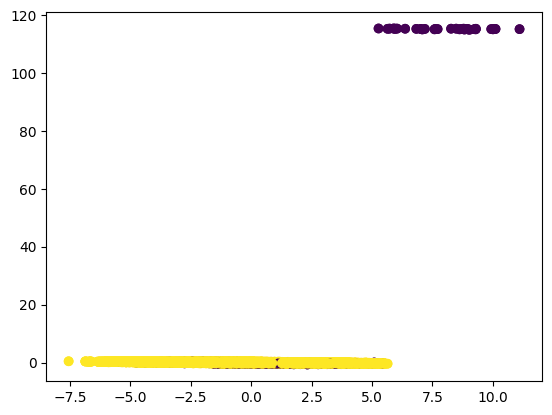

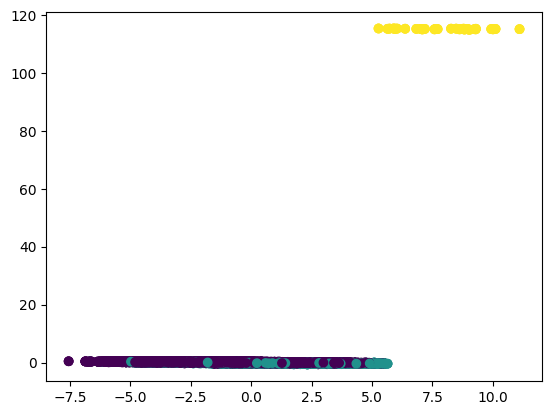

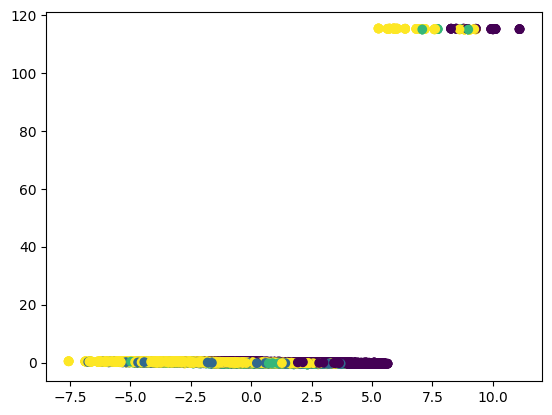

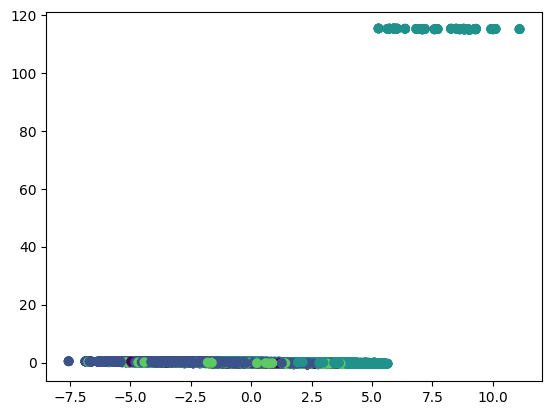

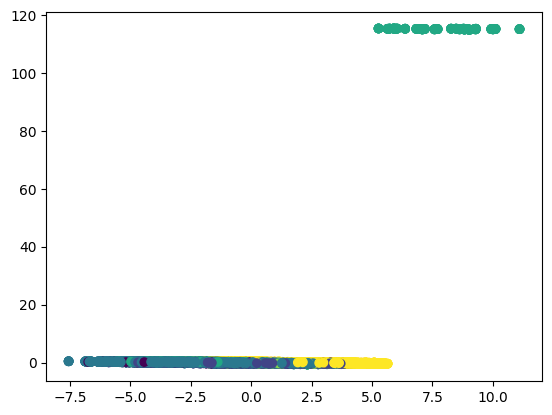

In [69]:
for i in range(2, 7):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(X)
    labels = gmm.predict(X)
    for j in range (i):
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X, labels))
    plt.show()

In [70]:
silhouettes

[0.527176065492724,
 0.20727551233678695,
 0.07661349751048539,
 0.08833739423102052,
 0.08516964488499093]

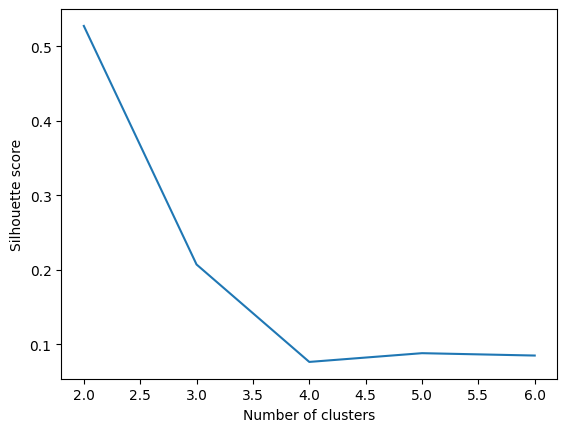

In [71]:
plt.plot(range(2, 7), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

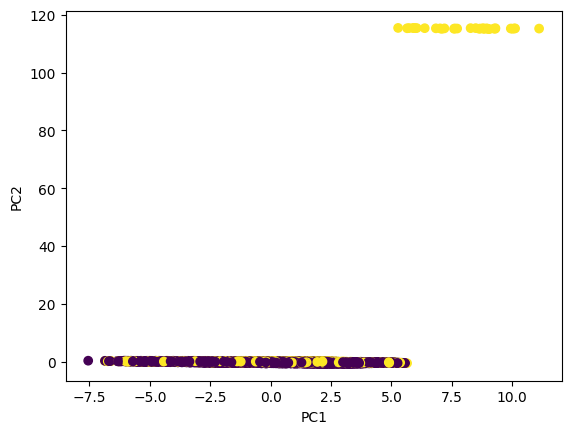

In [72]:
scatter = plt.scatter(X_pca["PC1"], X_pca["PC2"],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [73]:
model = GaussianMixture(n_components = 2)
model.fit(X)
labels = model.predict(X)

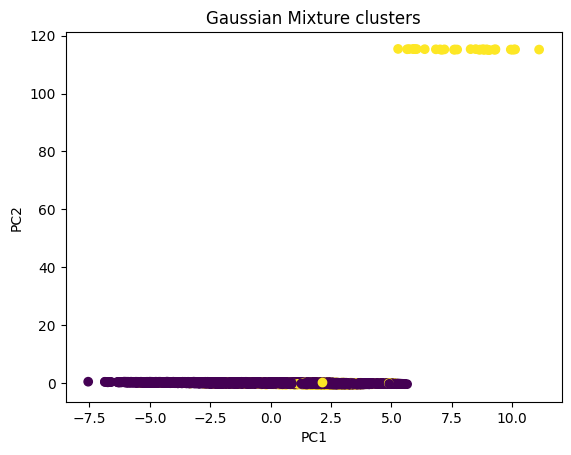

In [74]:
X_pca['labels']= labels
scatter = plt.scatter(X_pca["PC1"], X_pca["PC2"],c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('{} clusters'.format("Gaussian Mixture"))
plt.show()

In [75]:
def clustering_accuracy(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

In [76]:
clustering_accuracy(y, labels)

72.7764444102356